## Import Packages


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Analysing & Feature Engineering

#### Check NA Values

we could use mod,median to object or number values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Chechk Duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

#### Check data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking Unique Types Each Column

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Checking Description

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Exploring Data

In [9]:
for column in df.columns:
    if df[column].dtype =="O":
        print("Categories in {column} variable",end=" ")
        print(df[column].unique())

Categories in {column} variable ['female' 'male']
Categories in {column} variable ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in {column} variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in {column} variable ['standard' 'free/reduced']
Categories in {column} variable ['none' 'completed']


#### define numerical & categorical columns

In [10]:
numeric_features = [ feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Columns : Total Score Average

In [12]:
df["total score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = df["total score"]/ 3 
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df.reading_score==100]["average"].count()
writing_full = df[df.writing_score==100]["average"].count()
math_full = df[df.math_score==100]["average"].count()

print(f"Number of students with full marks in maths:{math_full}")
print(f"Number of students with full marks in readings:{reading_full}")
print(f"Number of students with full marks in writing:{writing_full}")


Number of students with full marks in maths:7
Number of students with full marks in readings:17
Number of students with full marks in writing:14


In [14]:
df.groupby('race_ethnicity').size()

race_ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
dtype: int64

In [15]:
df.groupby(['race_ethnicity', 'gender']).size()

race_ethnicity  gender
group A         female     36
                male       53
group B         female    104
                male       86
group C         female    180
                male      139
group D         female    129
                male      133
group E         female     69
                male       71
dtype: int64

In [16]:
for group_name, group_df in df.groupby('race_ethnicity'):
    print(group_df)
    for gender_name,gender_df in groupby('gender'):
        print(gender_name)

     gender race_ethnicity parental_level_of_education         lunch  \
3      male        group A          associate's degree  free/reduced   
13     male        group A                some college      standard   
14   female        group A             master's degree      standard   
25     male        group A             master's degree  free/reduced   
46   female        group A          associate's degree      standard   
..      ...            ...                         ...           ...   
974  female        group A                some college      standard   
983  female        group A                some college      standard   
985    male        group A                 high school      standard   
988  female        group A            some high school  free/reduced   
994    male        group A                 high school      standard   

    test_preparation_course  math_score  reading_score  writing_score  \
3                      none          47             57        

NameError: name 'groupby' is not defined

## Exploring Data

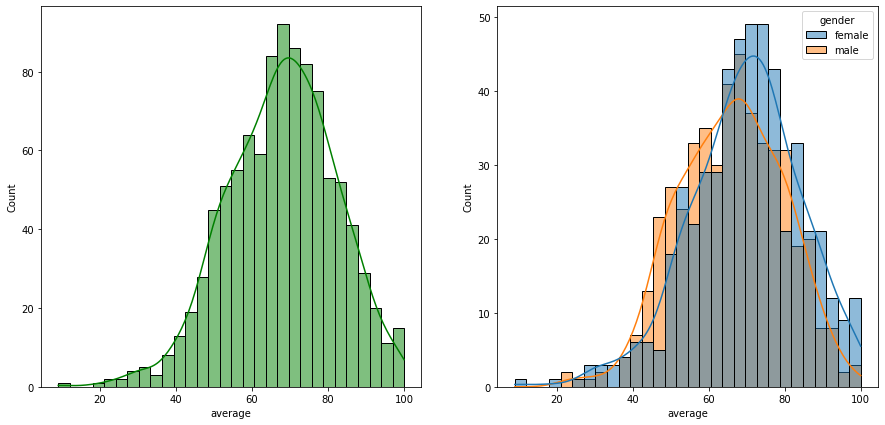

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="gender")
plt.show()